In [7]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
 
#Fetch data from Yahoo Finance
df = web.get_data_yahoo('RELIANCE.NS','2000-1-1', '2019-12-31')
df.to_csv('reliance.csv')


In [8]:
#resample data with a frequency of 3 months
new_df = df.resample('3M',closed = 'right', label='right').agg({'High':'max',
                                'Low':'min',
                                'Open':'first',
                                'Close':'last',
                                'Adj Close':'mean',
                                'Volume':'sum'})

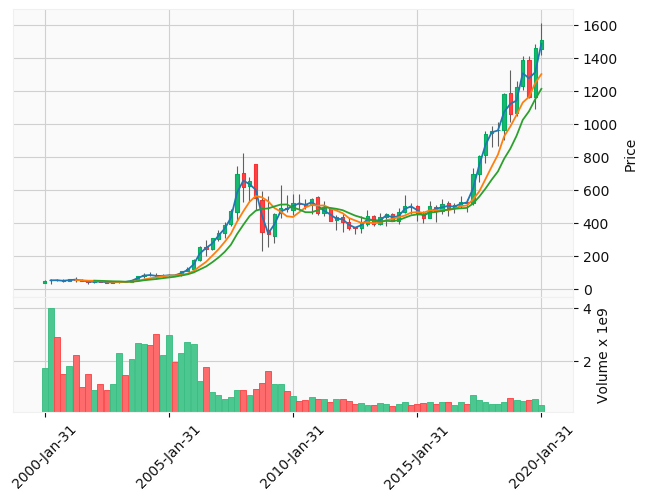

In [9]:
#Plot the graph using mplfinance
mpf.plot(new_df,type='candle',style='yahoo',volume=True,mav=(2,6,9))

In [10]:
#This is another way in which we can resample ohlc data.
#We resample 'Adj Close' column and run ohlc function on the data.
#Matlotlib needs dates in a specific format. Therefore, we run ndates.date2num function on dates column
df_ohlc = df['Adj Close'].resample('3M').ohlc()
df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [11]:
df_volume = df['Volume'].resample('3M').sum()
df_volume = df_volume.reset_index()
df_volume['Date'] = df_volume['Date'].map(mdates.date2num)

<BarContainer object of 81 artists>

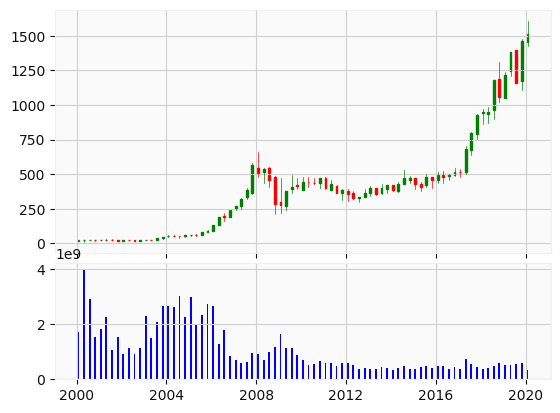

In [12]:
#Divide figure into 2 separate sub plots
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1),(4,0),rowspan=2, colspan=1, sharex = ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=30,colorup='g')
ax2.bar(df_volume['Date'], df_volume['Volume'].values, width=30,color = 'blue')